In [31]:
import numpy as np
import matplotlib.pyplot as plt

<h1> 1. 정규화 normlalize, RNSE 측정 get_rmse 구현

In [32]:
# 정규화
def normalize(X, mu = None, sigma=None):
  if mu is None and sigma is None: 
    mu = X.mean(axis=0) 
    sigma = X.std(axis=0) 
  return (X - mu)/sigma, mu, sigma

# 오차 (rmse) 계산
def get_rmse(y_true, y_pred): 
  assert len(y_true) == len(y_pred) 
  return np.sqrt(np.mean((y_true - y_pred)**2))

<h1> 2. 데이터 파일 읽어오기

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
data_tr = np.genfromtxt('drive/MyDrive/boston_houses_train.csv', delimiter=',', skip_header=1)
data_ts = np.genfromtxt('drive/MyDrive/boston_houses_test.csv', delimiter=',', skip_header=1)

# normalization
X_tr, mu_tr, sigma_tr = normalize(data_tr[:, :-1])
y_tr = data_tr[:, -1].astype(np.float64)
X_ts, _, _ = normalize(data_ts[:, :-1], mu_tr, sigma_tr)
y_ts = data_ts[:, -1].astype(np.float64)

# print
print(X_tr.shape)
print(y_tr.shape)
print(X_ts.shape)
print(y_ts.shape)

(456, 21)
(456,)
(50, 21)
(50,)


<h1> 3. w모델에 대한 에러 J(w, D)계산하는 함수 (cost function)

In [35]:
# 학습을 할때마다 w라는 계수 바뀌는데 이때 오차가 얼마인지 계산
def compute_cost(X, y, w):
  N = len(y)
  h = X @ w
  cost = (1/N)*np.sum((y-h)**2)
  return cost

In [36]:
# X, y 는 X부분의 y값, w는 계수, alpha는 gradient에서 어느정도 학습할건지. n_iter은 몇번 학습할건지. threshold는 얘보다 학습량이 작으면 종료되게
def gradient_descent(X, y, w, alpha, n_iters, threshold =1e-07):
  N = len(y)
  log_j = []
  j_last = np.Inf

  for i in range(n_iters):
    w_new = w - (-2*alpha/N * X.T @ (y - X @ w))
    j_new = compute_cost(X, y, w)

    if j_last - j_new < threshold:
      break

    w = w_new
    log_j.append(j_new)
    j_last = j_new

  return w, log_j

In [37]:
# gradient_descent 이용해서 학습
def train_linreg(X_tr, y_tr, alpha=0.01, n_iters=1500):
  N_tr, d_tr = X_tr.shape

  X_tr_b = np.hstack((X_tr, np.ones((N_tr, 1)) ))

  w_init = np.zeros(d_tr + 1)

  initial_cost = compute_cost(X_tr_b, y_tr, w_init)
  print("initial J(w_init, D_tr) is: ", initial_cost, "\n")

  # w_star = 각 가중치. log_j는 loss가 얼마나 줄었는지
  w_star, log_j = gradient_descent(X_tr_b, y_tr, w_init, alpha, n_iters)

  print("J(w*, D_tr): ", log_j[-1])
  print("w*: \n", w_star, "\n")

  return w_star, log_j


initial J(w_init, D_tr) is:  601.1605263157894 

J(w*, D_tr):  21.786880042225043
w*: 
 [-0.98423976  0.9789124   0.19501163  0.87777439 -0.78209369  1.05873945
 -0.09628398 -3.04293934  2.14854721 -1.55106407 -1.89858986  0.85519071
 -3.47077153  0.17586123  0.24059276 -0.64204962  1.05874273 -0.09680907
 -0.47352301  1.06483885 -0.09673251 22.69649123] 



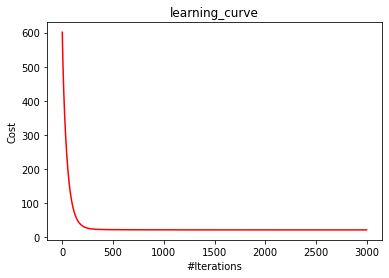

In [45]:
# 300번의 학습, 0.005만큼 학습
# log_j_linreg에 얼마나 학습이 되었는지 저장됨
Model_linreg, log_j_linreg = train_linreg(X_tr, y_tr, 0.005, 3000)

plt.plot(range(len(log_j_linreg)), log_j_linreg, 'r')
plt.title('learning_curve')
plt.ylabel('Cost')
plt.xlabel('#Iterations')
plt.show()

# cost가 줄어든다 = 학습이 잘 되고있다

In [46]:
# 실제로 X가 주어졌을 때 어떻게 예측해서 계산할것인가
def predict_linreg(X, w):
  N, d = X.shape
  X_b = np.hstack((X, np.ones((N, 1))))

  y_pred = X_b @ w

  return y_pred

4.66763967930312
5.002223099284747


(-10.0, 55.0)

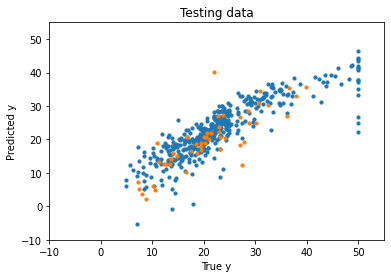

In [49]:
# 파란색 점 = training 데이터
# 빨간색 점 = 예측된 데이터

# Problem 2 (d) 
# prediction 
y_tr_pred = predict_linreg(X_tr, Model_linreg) 
y_ts_pred = predict_linreg(X_ts, Model_linreg) 

# print out the results 
print(get_rmse(y_tr, y_tr_pred))
print(get_rmse(y_ts, y_ts_pred))

# Draw scatter plots that compare true and predicted target values 
# (blue dots for y_tr: or anges dots for y_ts) 
plt.scatter (y_tr, y_tr_pred, s=10) 
plt.xlabel('True y') 
plt.ylabel('Predicted y') 
plt.title('Training data') 

plt.scatter (y_ts, y_ts_pred, s=10) 
plt.xlabel('True y') 
plt.ylabel('Predicted y') 
plt.title('Testing data') 

# plt.axline((-100, -100). (100, 100), c='grey', Iw=1) 
plt.ylim(-10, 55) 
plt.xlim(-10, 55)